# Non Linear Regression 

Begin by importing all necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
from scipy.optimize import minimize
%matplotlib inline 

mpl.style.available
mpl.style.use('ggplot') 

In [2]:
df = pd.read_csv('data/NonLinRegDataset.csv')

Explore first lines and data format using head()

In [3]:
df.head()

,X,Y
0,52.180138,200.108322
1,65.231421,215.061647
2,36.517554,171.206869
3,11.029448,112.232517
4,34.858912,130.389441


## Feature Scaling

Write function to scale features according to:

$$x_i = \frac{x_i - \mu_i}{std(x_i)}$$

Use mean() and max() operators built into pandas to do this.
The function should should return both the scaled input vector, as well as the mean and standard deviation so we can scale future inputs.
    

In [4]:
def FeatureScale(x):
    mu = x.mean()
    std = x.std()
    x_scaled = (x - mu) / std
    return x_scaled, mu, std

##Gradient definition

In [5]:
def g(y_obs,y_pred,x):
    g = (1/float(np.size(y_pred))) * np.sum((y_pred - y_obs)*x)
    return g

Define cost function:
$$C = \frac{1}{2m} \sum_{i=1}^m (y_{pred}^i - y_{obs}^i)^2$$

In [6]:
def CostFunction(y_obs,y_pred):
    cost = np.sum((y_pred - y_obs)**2) / (2*np.size(y_pred))
    return cost

Use plt.scatter() to plot X against Y

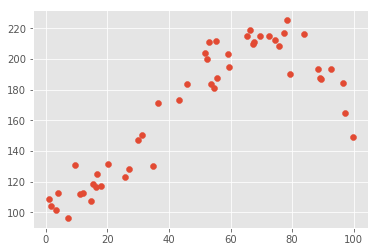

In [7]:
plt.scatter(df.X,df.Y)

We are interested in fitting a third order polynomial function to this dataset. At the moment, our only input feature is the original X input.
For simplicity, we can create the following input features:
$$X^2 \text{ and } X^3$$
In order to do this create new columns in the data frame equal to these.

In [8]:
df['X2'] = df.X**2
df['X3'] = df.X**3

We now need to scale all three feature vectors, which we can do using our original feature scaling function.
Ensure you store the scaling values once again, and store scaled values as new columns in data frame.

In [9]:
df['X_scaled'], X_mu, X_std = FeatureScale(df.X)
df['X2_scaled'], X2_mu, X2_std = FeatureScale(df.X2)
df['X3_scaled'], X3_mu, X3_std = FeatureScale(df.X3)

**Exercise** <br>
Finish gradient descent algorithm where:
$$\theta_j := \theta_j - \alpha g_j$$
remembering that 
$$x_0^i = 1 \quad \text{for all } i$$

Code polynomial function directly into the function (using the scaled features!)
Use g function coded earlier for the update equations.

In [10]:
def GradDescent(df, theta_0,theta_1,theta_2,theta_3,alpha,num_iters):
    
    #C_history records values for plotting
    C_history = []
    
    #Initalises Ypredicted to ensure existence in dataframe
    df['Ypredicted'] = df.Y
    
    for i in np.arange(num_iters):
        #Calculate prediction for parameter values
        df.Ypredicted = theta_0 + theta_1*df.X_scaled + theta_2*df.X2_scaled + theta_3*df.X3_scaled
        
        #Update parameters
        theta_0 -= alpha * g(df.Y,df.Ypredicted,1)
        theta_1 -= alpha * g(df.Y,df.Ypredicted,df.X_scaled)
        theta_2 -= alpha * g(df.Y,df.Ypredicted,df.X2_scaled)
        theta_3 -= alpha * g(df.Y,df.Ypredicted,df.X3_scaled)
            
        C_history.append([CostFunction(df.Y,df.Ypredicted)])
        
        
    print "Finished at ", [theta_0,theta_1,theta_2,theta_3]
    return theta_0, theta_1, theta_2, theta_3, np.array(C_history)

Set initial guess for all three parameters and alpha value, then run Gradient Descent algorithm

In [17]:
theta_0_guess = 
theta_1_guess = 10
theta_2_guess = 10
theta_3_guess = 0
alpha = 0.1
num_iters = 100

theta_0, theta_1, theta_2, theta_3, C_history = GradDescent(df, theta_0_guess,theta_1_guess,theta_2_guess,theta_3_guess,alpha,num_iters)

Finished at  [167.89453372877136, 48.78168053618758, 7.61109040308534, -26.946889649926096]


Use plt.plot() to plot the Cost function history and ensure convergence

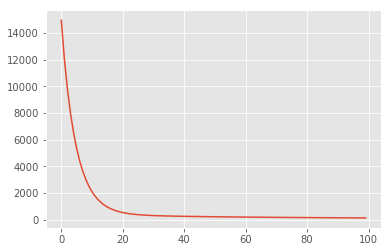

In [18]:
plt.plot(C_history)

Use the following code to plot the fitted function and observe how good the fit is

167.894533729


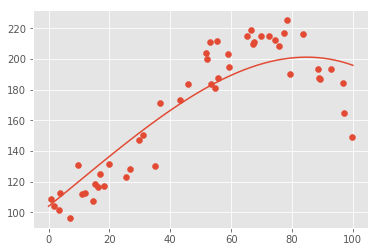

In [20]:
xpvec = np.linspace(0,100,100)
xpvec2 = xpvec**2
xpvec3 = xpvec**3
xpvec_scaled = (xpvec - X_mu) / X_std
xpvec2_scaled = (xpvec2 - X2_mu) / X2_std
xpvec3_scaled = (xpvec3 - X3_mu) / X3_std

ypred = theta_0 + theta_1*xpvec_scaled + theta_2*xpvec2_scaled + theta_3*xpvec3_scaled
print theta_0
plt.scatter(df.X,df.Y)
plt.plot(xpvec,ypred)

What is wrong with this plot? Why might it not have found a good fit?

The answer lies in the algorithm finding a LOCAL MINIMUM. Try changing the original guesses and see what happens to the line.